In [39]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
from  cooler_extended import  CoolerExtended

In [40]:
filepath = 'data/GSM3564252_RWPE1_HiC_40k.normalized.matrix.cool'
bases_in_bin = 40000 #for resolution 500kb - 500000
chr_number = "2" #number of interested chromosome or "X"
c = CoolerExtended(filepath)
sv_master_table = pd.read_csv("result2.csv",delimiter = "\t")

D:\Study\scientific\cooler_extended.py:12: RuntimeWarning: Mean of empty slice
  averages_at_dist = [np.nanmean(distribution_at_dist(arr, d)) for d in range(0, n)]
D:\Study\scientific\cooler_extended.py:16: RuntimeWarning: invalid value encountered in double_scalars
  ans[i, j] = arr[i, j] / averages_at_dist[abs(i - j)]


In [41]:
#getting normilized hiс matrix by chromosome
matrix = c.hic_matrices_normalized["chr"+chr_number]
#getting SVs
sv_for_chr = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number]
sv_bins_x = []
sv_bins_y = []
for x,y in zip(sv_for_chr["start1"].tolist(),sv_for_chr["start2"].tolist()):
    if abs((x//bases_in_bin)-(y//bases_in_bin))>1:
        sv_bins_x.append(x//bases_in_bin)
        sv_bins_y.append(y//bases_in_bin)

C:\Users\vit\AppData\Local\Temp/ipykernel_8628/435647992.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sv_for_chr = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number]


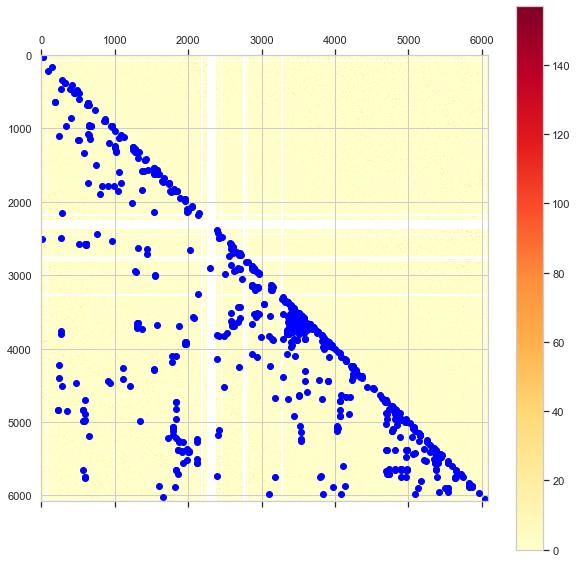

In [42]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix), cmap='YlOrRd')
fig.colorbar(im)
plt.scatter(sv_bins_x,sv_bins_y,c="blue")
plt.show()

In [43]:
#get hic scores for SVs
sv_hic_score = []
for x,y in zip(sv_bins_x,sv_bins_y):
    sv_hic_score.append(matrix[x][y])

#get hic scores for chromothripsis
chr_hic_score = []
chr_for_hic = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number][sv_master_table["chromo_label1"]!="No"]
chr_bins_x = []
chr_bins_y = []
for x,y in zip(chr_for_hic["start1"].tolist(),chr_for_hic["start2"].tolist()):
        if abs((x//bases_in_bin)-(y//bases_in_bin))>1:
            chr_bins_x.append(x//bases_in_bin)
            chr_bins_y.append(y//bases_in_bin)
for x,y in zip(chr_bins_x,chr_bins_y):
    chr_hic_score.append(matrix[x][y])

#get hic scores for shifted chromothripsis
chr_shift_hic_score = []
chr_shift_bins_x = []
chr_shift_bins_y = []
for x,y in zip(chr_bins_x,chr_bins_y):
    chr_shift_bins_x.append((x+10)%matrix.shape[0])
    chr_shift_bins_y.append((y+10)%matrix.shape[0])
for x,y in zip(chr_shift_bins_x,chr_shift_bins_y):
    chr_shift_hic_score.append(matrix[x][y])

#get hic scores for shifted SVs
sv_shift_hic_score = []
sv_shift_bins_x = []
sv_shift_bins_y = []
for x,y in zip(sv_bins_x,sv_bins_y):
    sv_shift_bins_x.append((x+10)%matrix.shape[0])
    sv_shift_bins_y.append((y+10)%matrix.shape[0])
for x,y in zip(sv_shift_bins_x,sv_shift_bins_y):
    sv_shift_hic_score.append(matrix[x][y])

C:\Users\vit\AppData\Local\Temp/ipykernel_8628/3955062698.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chr_for_hic = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number][sv_master_table["chromo_label1"]!="No"]


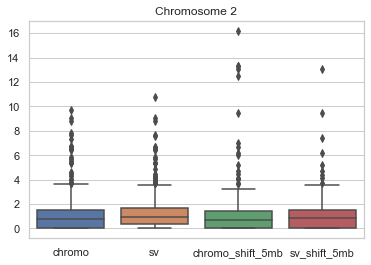

In [44]:
import seaborn as sns

sns.set_theme(style="whitegrid")
df = pd.DataFrame(list(zip(chr_hic_score, sv_hic_score, chr_shift_hic_score, sv_shift_hic_score)))
df.columns=['chromo','sv','chromo_shift_5mb','sv_shift_5mb']
ax = sns.boxplot(data=df).set_title("Chromosome "+chr_number)